In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [3]:
test=pd.read_csv("test.csv")

In [4]:
test.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0c49cbd6-dd97-4b99-9c05-c63a5d592fde,923ee454-6911-4f5a-9dfd-ba6b00b92718,Fully Paid,99999999,Short Term,728.0,1 year,Home Mortgage,76133.0,Debt Consolidation,1161.02,15.2,NaN,16,1,9880,14424,1.0,0.0
1,8be00956-6b7f-4b74-8398-87c8035605df,da041fa4-e423-4eb3-9d81-9ee1fd52f750,Fully Paid,34202,Short Term,724.0,10+ years,Home Mortgage,107492.0,Debt Consolidation,2902.28,17.2,71.0,17,0,26461,42135,0.0,0.0
2,57359000-1074-44fa-833b-4bea7a0a9d26,f9041857-4e0a-449c-af67-b2fbbd11950b,Fully Paid,17991,Short Term,743.0,10+ years,Own Home,69965.0,Debt Consolidation,1055.3,36.0,12.0,26,0,11713,61005,0.0,0.0
3,90a7d1b4-3997-414b-9abb-1de8cec79b18,304143c6-d619-48f3-9807-61371b47a230,Charged Off,31722,Long Term,686.0,2 years,Rent,72365.0,major_purchase,844.26,11.2,41.0,5,0,16151,19227,0.0,0.0
4,c2f24b30-bec3-4944-a417-c8d7b377810e,de2c8c55-468c-4b4b-b73f-7907eeb8e096,Fully Paid,13650,Long Term,719.0,7 years,Home Mortgage,78956.0,Debt Consolidation,520.45,20.4,35.0,9,0,17029,23784,0.0,0.0


In [5]:
test.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.667300e+04,21824.000000,2.182400e+04,26673.000000,12201.000000,26673.000000,26673.000000,26673.000000,26606.000000,26669.000000
mean,9.216777e+06,1177.261639,7.225179e+04,18.313534,35.114253,11.122333,0.157875,15332.593522,0.110501,0.028460
std,2.890483e+07,1646.617843,4.936155e+04,7.015942,22.182475,4.960582,0.477217,18136.024714,0.338204,0.276945
min,4.910000e+02,585.000000,4.033000e+03,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.086000e+03,711.000000,4.451900e+04,13.500000,16.000000,8.000000,0.000000,5991.000000,0.000000,0.000000
50%,1.330700e+04,731.000000,6.144100e+04,17.000000,32.000000,10.000000,0.000000,11090.000000,0.000000,0.000000
75%,2.158400e+04,743.000000,8.646950e+04,21.800000,51.000000,14.000000,0.000000,19157.000000,0.000000,0.000000
max,1.000000e+08,7510.000000,1.478700e+06,70.500000,143.000000,56.000000,15.000000,683524.000000,5.000000,15.000000


In [6]:
# 1. column names are separated by spaces make it single column
test.columns = test.columns.str.replace(" ","_")

In [7]:
test.columns=test.columns.str.lower()

In [8]:
test.shape

(26673, 19)

In [9]:
print("total samples",len(test.loan_id))
unique_id = len(set(test.loan_id))
print("unique samples ",unique_id)
duplicate_id = len(test.loan_id) - unique_id
print("duplicate ids",duplicate_id)

total samples 26673
unique samples  26673
duplicate ids 0


In [10]:
#years in current job
test.years_in_current_job.unique()

array(['1 year', '10+ years', '2 years', '7 years', nan, '< 1 year',
       '8 years', '4 years', '3 years', '9 years', '5 years', '6 years'],
      dtype=object)

In [11]:
#remove years,+,NAN   ... /d is matching decimal digit
test["years_in_current_job"]=[0 if str(x) =="< 1 year" else x if str(x) == "nan" else int(re.findall(r'\d+',str(x))[0]) for x in (test['years_in_current_job'])]
test["years_in_current_job"].head()

0     1.0
1    10.0
2    10.0
3     2.0
4     7.0
Name: years_in_current_job, dtype: float64

In [12]:
#2. credit score
test["credit_score"].head(10)

0     728.0
1     724.0
2     743.0
3     686.0
4     719.0
5     717.0
6    7340.0
7     731.0
8     734.0
9       NaN
Name: credit_score, dtype: float64

In [13]:
#will write a function which brings credit score in range
def credit_score(x):
    if x > 800:
        return int(x/10)
    elif str(x) =="nan":
        return x
    else:
        return int(x)

In [14]:
test["credit_score"]=test["credit_score"].map(credit_score)
test["credit_score"].head(10)

0    728.0
1    724.0
2    743.0
3    686.0
4    719.0
5    717.0
6    734.0
7    731.0
8    734.0
9      NaN
Name: credit_score, dtype: float64

In [15]:
#max open credit
print(test.shape)
test[test['maximum_open_credit']=='#VALUE!']

(26673, 19)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
11382,e42ae1f7-74b5-46d7-95ce-46a88918ba12,a679ed55-963a-4de6-8be0-4364eb601b6f,Charged Off,2052,Short Term,703.0,10.0,Rent,95105.0,Debt Consolidation,1910.02,22.4,37.0,9,0,0,#VALUE!,0.0,0.0


In [16]:
test = test[test['maximum_open_credit'] != '#VALUE!']
test['maximum_open_credit']= pd.to_numeric(test['maximum_open_credit'])
test.shape

(26672, 19)

In [17]:
#Monthly debt has Currency symbol due to which its datatype is string, remove it and convert it to numeric.
test['monthly_debt']=test['monthly_debt'].str.strip('$')
test['monthly_debt']=pd.to_numeric(test['monthly_debt'])
test['monthly_debt'].describe()

count    26672.000000
mean       961.798365
std        626.526777
min          0.000000
25%        532.305000
50%        846.995000
75%       1250.632500
max       9060.850000
Name: monthly_debt, dtype: float64

#### handling missing value and outliers

In [18]:
test.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,2.667200e+04,21823.000000,25532.000000,2.182300e+04,26672.000000,26672.000000,12200.000000,26672.000000,26672.000000,26672.000000,2.667200e+04,26605.000000,26668.000000
mean,9.217122e+06,719.927233,5.845606,7.225075e+04,961.798365,18.313381,35.114098,11.122413,0.157881,15333.168379,3.638579e+04,0.110506,0.028461
std,2.890531e+07,27.632983,3.636220,4.936244e+04,626.526777,7.016029,22.183377,4.960658,0.477225,18136.121693,4.696288e+05,0.338209,0.276950
min,4.910000e+02,585.000000,0.000000,4.033000e+03,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.086000e+03,708.000000,2.000000,4.451900e+04,532.305000,13.500000,16.000000,8.000000,0.000000,5991.000000,1.271800e+04,0.000000,0.000000
50%,1.330800e+04,728.000000,6.000000,6.144000e+04,846.995000,17.000000,32.000000,10.000000,0.000000,11092.000000,2.170750e+04,0.000000,0.000000
75%,2.158400e+04,740.000000,10.000000,8.646550e+04,1250.632500,21.800000,51.000000,14.000000,0.000000,19157.500000,3.611725e+04,0.000000,0.000000
max,1.000000e+08,751.000000,10.000000,1.478700e+06,9060.850000,70.500000,143.000000,56.000000,15.000000,683524.000000,5.930574e+07,5.000000,15.000000


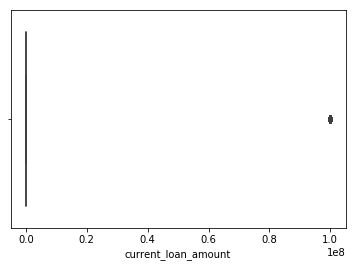

In [19]:
# current loan amount
ax=sns.boxplot(test["current_loan_amount"],orient='h')

In [20]:
test[test["current_loan_amount"] == 99999999]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,0c49cbd6-dd97-4b99-9c05-c63a5d592fde,923ee454-6911-4f5a-9dfd-ba6b00b92718,Fully Paid,99999999,Short Term,728.0,1.0,Home Mortgage,76133.0,Debt Consolidation,1161.02,15.2,NaN,16,1,9880,14424,1.0,0.0
40,b2130dbe-06ca-4adc-a7a9-4ad9de80e486,b377cc5f-b418-40ed-9d6c-e2a4cd2a8d3c,Fully Paid,99999999,Short Term,751.0,9.0,Rent,72120.0,Other,1646.74,17.2,NaN,20,0,206,4469,0.0,0.0
54,d1522b51-9aa7-48e2-b116-9cf696b1541a,af3110b4-579e-45d2-9674-4ce2a4792a05,Fully Paid,99999999,Short Term,749.0,0.0,Rent,49285.0,Debt Consolidation,656.31,15.9,NaN,6,0,7694,10177,0.0,0.0
65,9210e0be-835d-439c-b21a-b2e753e76bbb,f0bb0e2f-dd0d-430f-8557-d58ccb7dceb2,Fully Paid,99999999,Short Term,738.0,7.0,Home Mortgage,35060.0,Home Improvements,279.60,13.6,22.0,7,0,1109,20535,0.0,0.0
67,07c05b12-3779-4684-8570-0af110f63a72,1b6c04b9-e74c-418d-b888-eadb3a5fc39d,Fully Paid,99999999,Long Term,727.0,7.0,Home Mortgage,39276.0,Debt Consolidation,798.61,10.7,NaN,9,0,11742,15997,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26620,446b7993-767c-4196-a49c-68b9dac2e520,6d141fd5-de35-45dd-92a8-b4fd2b898a22,Fully Paid,99999999,Short Term,730.0,10.0,Home Mortgage,142187.0,Debt Consolidation,2109.10,14.5,39.0,17,0,9774,10299,0.0,0.0
26648,02199021-da32-4ff1-97f9-9b12d7b8df12,1a269000-8ee2-4b50-8c13-bc4e72f8c480,Fully Paid,99999999,Short Term,747.0,9.0,Home Mortgage,71722.0,Debt Consolidation,1637.65,17.6,NaN,13,0,21437,46500,0.0,0.0
26650,a2099b18-5cd5-4d35-8cea-65d4a3f29a05,2b3f990d-a46d-40d7-abb0-791b158c6ddc,Fully Paid,99999999,Short Term,747.0,8.0,Home Mortgage,46349.0,Debt Consolidation,513.70,46.9,56.0,13,0,10945,42586,0.0,0.0
26670,90aff423-10d6-479d-9ffc-8d3a74603938,5ea1d9d9-3d1e-4a45-b935-8f1cf34dd92d,Fully Paid,99999999,Short Term,750.0,5.0,Own Home,33492.0,Buy a Car,381.81,14.4,NaN,7,0,995,18422,0.0,0.0


In [21]:
#since it is a placeholder which can be replaced by nans
test["current_loan_amount"]=[np.nan if int(x)==99999999 else x for x in test["current_loan_amount"]]

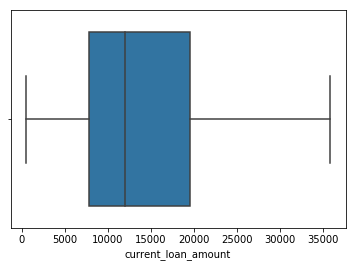

In [22]:
ax = sns.boxplot(test["current_loan_amount"])

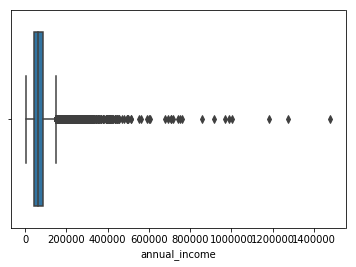

In [23]:
sns.boxplot(test["annual_income"])

In [24]:
test[test['annual_income']>1100000.000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
9470,4618d7d2-6eb0-4c05-9956-a421992bdaae,bbf74537-4cd3-4ffb-b75a-7b3d3c0009e2,Fully Paid,34503.0,Short Term,729.0,10.0,Home Mortgage,1478700.0,other,5298.68,18.4,20.0,15,4,83918,88242,0.0,4.0
21777,85a6f5ea-41ec-4c8b-9539-bbb75d335ae1,5596983d-4f23-4020-859a-376bf2205b28,Charged Off,34237.0,Short Term,745.0,5.0,Own Home,1271660.0,Debt Consolidation,815.99,28.1,NaN,22,0,9665,55226,0.0,0.0
22759,12bb0391-54ab-4ab0-ad54-c8b104c41f16,3dbb7631-bffa-4347-bbbd-e6c4c247837a,Fully Paid,24615.0,Long Term,698.0,10.0,Rent,1181520.0,Debt Consolidation,403.69,18.0,NaN,4,0,10996,15754,0.0,0.0


In [25]:
test = test.drop([9470, 21777,22759])

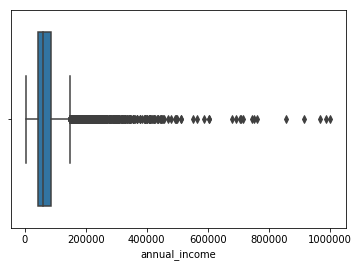

In [26]:
#still there are lot of outliers 
sns.boxplot(test["annual_income"],orient='h')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


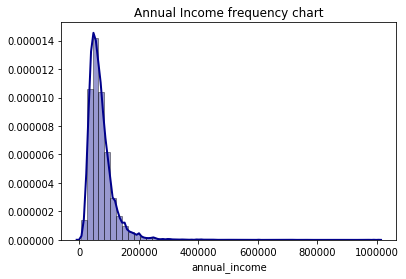

In [27]:
#it is normally distributed with right tail.. we can say that there can be some people with greater income per annum
sns.distplot(test['annual_income'].dropna(), hist=True,color="darkblue",
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income frequency chart'); 
plt.show()

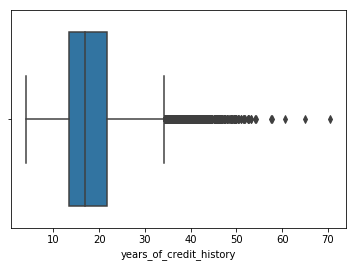

In [28]:
#years in credit history
sns.boxplot(test["years_of_credit_history"],orient='h')

In [29]:
test[test["years_of_credit_history"]> 57]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
1498,8db8729d-afec-496d-a978-e088a827965a,1da4f9c0-f0cb-4162-8cc1-dbe21279fc40,Fully Paid,NaN,Short Term,726.0,NaN,Home Mortgage,21920.0,Buy a Car,57.72,57.7,NaN,3,1,1639,3416,1.0,0.0
4829,ad206b2c-c2d5-4bd8-a139-de6c87cfef3f,c95a500c-eea4-4d78-a09e-1e5218a33358,Charged Off,10951.0,Short Term,748.0,NaN,Own Home,51918.0,Debt Consolidation,908.57,60.5,8.0,6,0,24249,35661,0.0,0.0
5060,e4c99559-cd12-4b4d-abc9-fb1d04762537,57251652-1195-46e9-a71d-e68dacd51701,Fully Paid,11965.0,Short Term,721.0,9.0,Home Mortgage,47362.0,Debt Consolidation,365.09,65.0,33.0,12,0,12578,24712,0.0,0.0
7565,1030f003-15eb-47de-b98e-a782e17454df,b3aae317-742a-4b57-86a1-7f85f3833b20,Charged Off,24576.0,Short Term,662.0,NaN,Rent,102400.0,Other,1399.47,57.5,31.0,15,0,25592,45375,0.0,0.0
24164,7db95e04-1081-43e1-8dab-77d0202145f8,6bb86735-f834-42b3-bd98-360da7094185,Fully Paid,6109.0,Short Term,743.0,6.0,Home Mortgage,33964.0,Home Improvements,0.00,70.5,78.0,5,2,0,0,0.0,0.0


In [30]:
test = test.drop([1498,4829,5060,7565,24164])

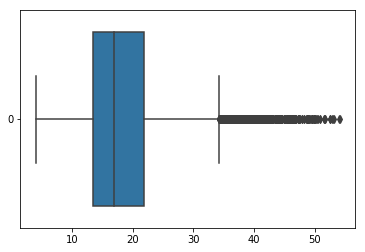

In [31]:
ax = sns.boxplot(data=test['years_of_credit_history'], orient="h")

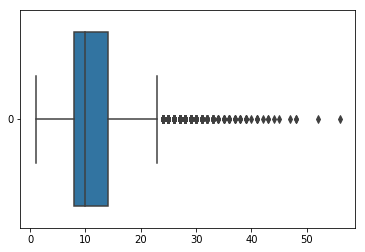

In [32]:
#num of open accounts
ax = sns.boxplot(data=test['number_of_open_accounts'], orient="h")

In [33]:
test[test['number_of_open_accounts']>50]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
4935,1653fa6e-eaef-41ce-831c-db5172fc966b,9646ae9b-104e-4b8d-913a-cecfbcd11de4,Fully Paid,18214.0,Short Term,721.0,8.0,Rent,67440.0,Debt Consolidation,1893.92,16.8,NaN,56,0,33929,55169,0.0,0.0
18759,8c32029e-0af5-4d1f-852f-2f0325bf6f42,50636032-0df6-4e6d-af9d-474f317c77e0,Charged Off,5837.0,Short Term,711.0,3.0,Own Home,36297.0,Debt Consolidation,356.92,8.9,NaN,52,0,1678,12342,0.0,0.0


In [34]:
test = test.drop([5935,18759])

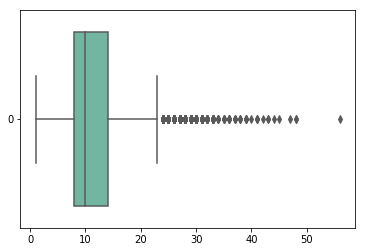

In [35]:
#values are not in continuous
ax = sns.boxplot(data=test['number_of_open_accounts'], orient="h", palette="Set2")

In [36]:
#we will perform capping it means replacing outliers with max value
IQR = test['number_of_open_accounts'].quantile(0.75) - test['number_of_open_accounts'].quantile(0.25)
upper_limit = test['number_of_open_accounts'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 23.0


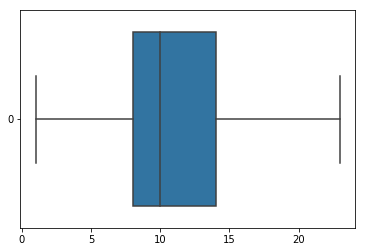

In [37]:
test['number_of_open_accounts'] = [23.0 if ( x>23.0 and x!=np.nan) else x for x in test['number_of_open_accounts']]
ax = sns.boxplot(data=test['number_of_open_accounts'], orient="h")

In [38]:
#will check for Nan values
test.isnull().sum().sort_values(ascending=False)

months_since_last_delinquent    14468
credit_score                     4849
annual_income                    4849
current_loan_amount              2454
years_in_current_job             1137
bankruptcies                       67
tax_liens                           4
home_ownership                      0
customer_id                         0
loan_status                         0
term                                0
purpose                             0
monthly_debt                        0
years_of_credit_history             0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
loan_id                             0
dtype: int64

In [39]:
# Since percentage value of Missing values in Bankruptcies and Tax Liens are very low we can delete the rows
test = test.dropna(subset=['bankruptcies', 'tax_liens'])
print(test.shape)
test.isnull().sum().sort_values(ascending=False)

(26595, 19)


months_since_last_delinquent    14467
annual_income                    4833
credit_score                     4833
current_loan_amount              2447
years_in_current_job             1137
tax_liens                           0
customer_id                         0
loan_status                         0
term                                0
home_ownership                      0
purpose                             0
bankruptcies                        0
monthly_debt                        0
years_of_credit_history             0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
loan_id                             0
dtype: int64

In [40]:
#it describes the number of months since the credit is not paid, so NA's actually are the genuine customers so replacing it with 0
test["months_since_last_delinquent"].fillna(0, inplace = True)
print(test.shape)
test.isnull().sum().sort_values(ascending=False)

(26595, 19)


annual_income                   4833
credit_score                    4833
current_loan_amount             2447
years_in_current_job            1137
tax_liens                          0
customer_id                        0
loan_status                        0
term                               0
home_ownership                     0
purpose                            0
bankruptcies                       0
monthly_debt                       0
years_of_credit_history            0
months_since_last_delinquent       0
number_of_open_accounts            0
number_of_credit_problems          0
current_credit_balance             0
maximum_open_credit                0
loan_id                            0
dtype: int64

In [41]:
test.reset_index()

,index,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,0,0c49cbd6-dd97-4b99-9c05-c63a5d592fde,923ee454-6911-4f5a-9dfd-ba6b00b92718,Fully Paid,NaN,Short Term,728.0,1.0,Home Mortgage,76133.0,Debt Consolidation,1161.02,15.2,0.0,16.0,1,9880,14424,1.0,0.0
1,1,8be00956-6b7f-4b74-8398-87c8035605df,da041fa4-e423-4eb3-9d81-9ee1fd52f750,Fully Paid,34202.0,Short Term,724.0,10.0,Home Mortgage,107492.0,Debt Consolidation,2902.28,17.2,71.0,17.0,0,26461,42135,0.0,0.0
2,2,57359000-1074-44fa-833b-4bea7a0a9d26,f9041857-4e0a-449c-af67-b2fbbd11950b,Fully Paid,17991.0,Short Term,743.0,10.0,Own Home,69965.0,Debt Consolidation,1055.30,36.0,12.0,23.0,0,11713,61005,0.0,0.0
3,3,90a7d1b4-3997-414b-9abb-1de8cec79b18,304143c6-d619-48f3-9807-61371b47a230,Charged Off,31722.0,Long Term,686.0,2.0,Rent,72365.0,major_purchase,844.26,11.2,41.0,5.0,0,16151,19227,0.0,0.0
4,4,c2f24b30-bec3-4944-a417-c8d7b377810e,de2c8c55-468c-4b4b-b73f-7907eeb8e096,Fully Paid,13650.0,Long Term,719.0,7.0,Home Mortgage,78956.0,Debt Consolidation,520.45,20.4,35.0,9.0,0,17029,23784,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26590,26668,2ad6c84d-0343-4cd4-b54b-999a461141a0,2f44fa9f-60b5-46a1-812e-861c414cf703,Charged Off,12377.0,Long Term,681.0,10.0,Home Mortgage,48920.0,Debt Consolidation,1178.16,13.2,0.0,10.0,1,7710,12141,1.0,0.0
26591,26669,9090b72d-0950-47dc-b43a-995b8cd061c1,9f9f4efd-df30-4a10-94e3-48f3b6b01bf8,Charged Off,20302.0,Long Term,727.0,4.0,Home Mortgage,86284.0,Debt Consolidation,963.50,18.4,0.0,9.0,0,20137,27813,0.0,0.0
26592,26670,90aff423-10d6-479d-9ffc-8d3a74603938,5ea1d9d9-3d1e-4a45-b935-8f1cf34dd92d,Fully Paid,NaN,Short Term,750.0,5.0,Own Home,33492.0,Buy a Car,381.81,14.4,0.0,7.0,0,995,18422,0.0,0.0
26593,26671,6569c063-73a2-4a4f-a7a9-049971061746,bb10a205-a873-441c-8985-5ec2114ef198,Fully Paid,10213.0,Short Term,NaN,5.0,Rent,NaN,Debt Consolidation,531.21,12.8,60.0,7.0,0,6004,18362,0.0,0.0


In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [43]:
test.reset_index(drop=True, inplace=True)
my_imputer = IterativeImputer()
#For this we need only numerical variables so filtering this
test_numerical = test._get_numeric_data()
test_numerical_columns = test_numerical.columns 
print(test_numerical.shape)
test_numerical.isnull().sum()

(26595, 13)


current_loan_amount             2447
credit_score                    4833
years_in_current_job            1137
annual_income                   4833
monthly_debt                       0
years_of_credit_history            0
months_since_last_delinquent       0
number_of_open_accounts            0
number_of_credit_problems          0
current_credit_balance             0
maximum_open_credit                0
bankruptcies                       0
tax_liens                          0
dtype: int64

In [44]:
test_imputed = my_imputer.fit_transform(test_numerical)
#Imputer will give the array as an object so need to convert it to Dataframe with columns
test_imputed = pd.DataFrame(test_imputed, columns=test_numerical_columns)
test_imputed.isnull().sum()

current_loan_amount             0
credit_score                    0
years_in_current_job            0
annual_income                   0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

In [45]:
test_imputed.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,26595.000000,26595.000000,26595.000000,2.659500e+04,26595.000000,26595.000000,26595.000000,26595.000000,26595.000000,26595.000000,2.659500e+04,26595.000000,26595.000000
mean,13874.109806,720.142409,5.866494,7.184837e+04,963.104067,18.298199,16.065238,11.031246,0.157924,15337.749126,3.592741e+04,0.110472,0.028389
std,8008.321935,26.118063,3.563170,4.479409e+04,625.870698,6.986993,23.043235,4.633775,0.476993,18134.362281,4.643726e+05,0.338180,0.276255
min,701.000000,585.000000,0.000000,4.033000e+03,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8018.000000,711.000000,3.000000,4.554044e+04,534.165000,13.500000,0.000000,8.000000,0.000000,5998.000000,1.272400e+04,0.000000,0.000000
50%,12029.000000,725.000000,6.000000,6.249500e+04,848.740000,17.000000,0.000000,10.000000,0.000000,11100.000000,2.171100e+04,0.000000,0.000000
75%,18444.000000,739.000000,10.000000,8.602450e+04,1252.250000,21.800000,29.000000,14.000000,0.000000,19159.500000,3.612250e+04,0.000000,0.000000
max,75982.224993,1603.253987,10.000000,1.001000e+06,9060.850000,54.200000,143.000000,23.000000,15.000000,683524.000000,5.930574e+07,5.000000,15.000000


In [46]:
#Replacing the features in Train dataframe by above Imputed dataframe
test_imputed.shape

(26595, 13)

In [47]:
test.shape

(26595, 19)

In [48]:
test['years_in_current_job'] = test_imputed['years_in_current_job']
test['current_loan_amount'] = test_imputed['current_loan_amount']
test['credit_score'] = test_imputed['credit_score']
test['annual_income'] = test_imputed['annual_income']

In [49]:
print(test.shape)
test.isnull().sum()

(26595, 19)


loan_id                         0
customer_id                     0
loan_status                     0
current_loan_amount             0
term                            0
credit_score                    0
years_in_current_job            0
home_ownership                  0
annual_income                   0
purpose                         0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

In [50]:
#Converting Months since last delinquent into categories
test['months_since_last_delinquent'] = ['extreme_risk' if x>51 
        else 'high_risk' if x>32 
        else 'moderate_risk' if x>16 
        else 'low_risk' if x>0 else 'no_risk' for x in test['months_since_last_delinquent']]

In [51]:
test['months_since_last_delinquent'].unique()

array(['no_risk', 'extreme_risk', 'low_risk', 'high_risk',
       'moderate_risk'], dtype=object)

In [52]:
#drop them as they are not required
test.drop(['loan_id', 'customer_id'], axis=1, inplace=True)

In [53]:
test.shape

(26595, 17)

In [54]:
#Handling Categorical Variables
# importing one hot encoder from sklearn 
from sklearn.preprocessing import LabelEncoder

In [55]:
#Applying Label Encoding to Loan Status
le = LabelEncoder()
test['loan_status'] = le.fit_transform(test.loan_status)
print(le.classes_)

['Charged Off' 'Fully Paid']


In [56]:
test.loan_status.unique()

array([1, 0])

In [57]:
test.term.unique()

array(['Short Term', 'Long Term'], dtype=object)

In [58]:
test.home_ownership.unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [59]:
test['home_ownership'] = ['Mortgage' if 'Mortgage' in x else x for x in test['home_ownership']]

In [60]:
test.home_ownership.unique()

array(['Mortgage', 'Own Home', 'Rent'], dtype=object)

In [61]:
test.purpose.unique()

array(['Debt Consolidation', 'major_purchase', 'Home Improvements',
       'other', 'Other', 'vacation', 'Buy a Car', 'Medical Bills',
       'moving', 'wedding', 'Business Loan', 'Buy House', 'Take a Trip',
       'Educational Expenses', 'small_business', 'renewable_energy'],
      dtype=object)

In [62]:
#ther can be N reasons
test.drop(['purpose'], axis=1, inplace=True)

In [63]:
test.months_since_last_delinquent.unique()

array(['no_risk', 'extreme_risk', 'low_risk', 'high_risk',
       'moderate_risk'], dtype=object)

In [64]:
cols_to_transform = ['term', 'home_ownership','months_since_last_delinquent' ]
test_with_dummies = pd.get_dummies(test, prefix=cols_to_transform )

In [65]:
test_with_dummies.head()

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,...,term_Long Term,term_Short Term,home_ownership_Mortgage,home_ownership_Own Home,home_ownership_Rent,months_since_last_delinquent_extreme_risk,months_since_last_delinquent_high_risk,months_since_last_delinquent_low_risk,months_since_last_delinquent_moderate_risk,months_since_last_delinquent_no_risk
0,1,12226.817028,728.0,1.0,76133.0,1161.02,15.2,16.0,1,9880,...,0,1,1,0,0,0,0,0,0,1
1,1,34202.000000,724.0,10.0,107492.0,2902.28,17.2,17.0,0,26461,...,0,1,1,0,0,1,0,0,0,0
2,1,17991.000000,743.0,10.0,69965.0,1055.30,36.0,23.0,0,11713,...,0,1,0,1,0,0,0,1,0,0
3,0,31722.000000,686.0,2.0,72365.0,844.26,11.2,5.0,0,16151,...,1,0,0,0,1,0,1,0,0,0
4,1,13650.000000,719.0,7.0,78956.0,520.45,20.4,9.0,0,17029,...,1,0,1,0,0,0,1,0,0,0


In [66]:
total_len = len(test_with_dummies['loan_status'])
percentage_labels = (test_with_dummies['loan_status'].value_counts()/total_len)*100
percentage_labels

1    71.697688
0    28.302312
Name: loan_status, dtype: float64

In [67]:
test_with_dummies.to_csv("test_with_dummies.csv",index=False)

In [68]:
test_with_dummies.shape

(26595, 23)